# HW 2 - Classification

Kim Thach
*ECGR 5090 - C01*
**800793249**

Table of Contents

1. Logistic Regression
2. Naive Bayes Binary Classifier
3. K-fold Cross Validation
3. K-fold Cross Validiation Part 2


## Problem 1: Logistic Regresion

Original Problem Statement:

* Using the diabetes dataset, build a logistic regression binary classifier for positive diabetes. 

* Please use 80% and 20% split between training and evaluation (test). 

* Make sure to perform proper scaling and standardization before your training. 

* Report your results, including accuracy, precision, and recall. Also, plot the confusion matrix representing your binary classifier. 


In [1]:
# Initialize some libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read in Dataset
DF = pd.DataFrame(pd.read_csv("diabetes.csv"))
print(DF.head())

# What's the size of the dataset?

print('This dataset has ' + str(DF.shape[0]) +' rows')
print('This dataset has ' + str(DF.shape[1]) +' columns')

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
This dataset has 768 rows
This dataset has 9 columns


In [2]:
# Define Input and Outputs for the dataset
Xin = DF.iloc[:,[0,1,2,3,4,5,6,7]].values
Yout = DF.Outcome.values

#print(Xin[0:5,:])


In [3]:
# Split data set
from sklearn.model_selection import train_test_split

np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(Xin, Yout, train_size = 0.8, test_size = 0.2, random_state = 42)

In [4]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler 

scaler_std = StandardScaler() 
train_std = scaler_std.fit_transform(x_train) 
test_std = scaler_std.transform(x_test) 

#scaler_mm = MinMaxScaler()
#train_mm = scaler_mm.fit_transform(x_train) 
#test_mm = scaler_mm.transform(x_test) 



In [5]:
from sklearn.linear_model import LogisticRegression 

classifier = LogisticRegression(random_state=0) 
classifier.fit(train_std, y_train)


LogisticRegression(random_state=0)

In [6]:
Y_pred = classifier.predict(test_std)

Y_pred[0:9]

#(Y_pred == y_test).mean()

array([0, 0, 0, 0, 0, 0, 0, 1, 1], dtype=int64)

In [7]:
# Confusion matrix to get accuracy
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, Y_pred)
cnf_matrix


array([[79, 20],
       [18, 37]], dtype=int64)

In [8]:
# Evaluate the model : accuracy, precision & recall

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test,Y_pred))
print("Precision:",metrics.precision_score(y_test,Y_pred))
print("Recall:",metrics.recall_score(y_test, Y_pred))

Accuracy: 0.7532467532467533
Precision: 0.6491228070175439
Recall: 0.6727272727272727


Text(0.5, 257.44, 'Predicted label')

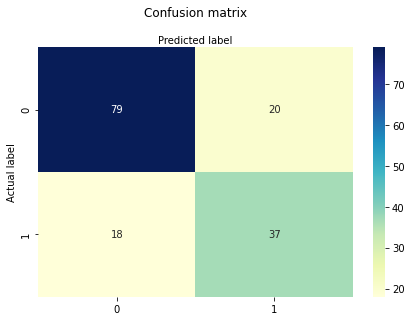

In [9]:
# Visualization of the model

import seaborn as sns
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [49]:
import warnings 
warnings.filterwarnings('ignore')
from matplotlib.colors import ListedColormap

X_set = test_std[:,0:2] 
Y_set = y_test
print(X_set.shape)
print(y.shape)

X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min() -1, stop = X_set[:,0].max()),np.arange(start = X_set[:,1].min() -1, stop = X_set[:,1].max()))
print(X1.shape)
print(X2.shape)

xgrid = np.array([X1.ravel(),X2.ravel()]).T
#print(xgrid)
#XT = classifier.predict(test_std).reshape(xgrid.shape)

XT = classifier.predict(xgrid).reshape(X1.shape)

plt.contourf(X1, X2, XT, alpha = 0.75, cmap=ListedColormap(('red','green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(Y_set)):
    plt.scatter(X_set[Y_set == j, 0], X_set[Y_set ==j, 1], c = ListedColormap(('yellow','blue'))(i),label = j)

    plt.title('Logistic Regression (Test set)')
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.legend()
    plt.show()


(154, 2)
(154,)
(6, 5)
(6, 5)


ValueError: X has 2 features per sample; expecting 8

(154, 8)
(154, 2)
(154,)
(2500, 2)


ValueError: Contour levels must be increasing

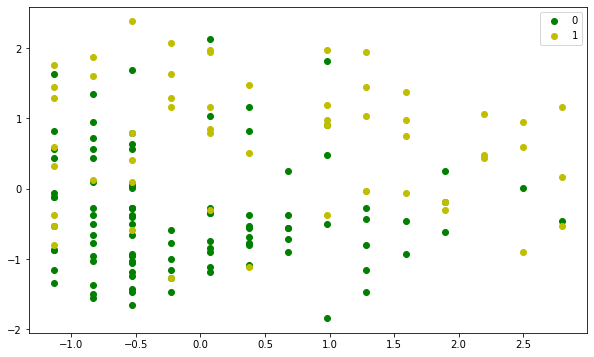

In [73]:

X, y = test_std[:,0:2], y_test
print(test_std.shape)
print(X.shape)
print(y.shape)

plt.figure(figsize = (10, 6))


plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color = 'g', label = '0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color = 'y', label = '1')
plt.legend()

x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.array([xx1.ravel(), xx2.ravel()]).T
print(grid.shape)

#probs = classifier.predict(test_std)

#plt.plot(xx1, xx2, [0.5], linewidths=1, colors='red');
plt.contourf(xx1, xx2)

## Problem 2

Using the diabetes dataset, build a Naïve Bays binary classifier for positive diabetes. 

Please use 80% and 20% split between training and evaluation (test). 

Make sure to perform proper scaling and standardization before your training. 

Report your results, including accuracy, precision, and recall. 

Also, plot the confusion matrix representing your binary classifier. 

Compare and analyze your results against problem 1.



In [ ]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(train_std,y_train)


GaussianNB()

In [ ]:
Y2_pred = classifier.predict(test_std)

In [ ]:
from sklearn import metrics
cm = confusion_matrix(y_test, Y2_pred)
print(cm)
print("Accuracy:",metrics.accuracy_score(y_test,Y2_pred))
print("Precision:",metrics.precision_score(y_test,Y2_pred))
print("Recall:",metrics.recall_score(y_test, Y2_pred))

# Has a higher accuracy, but why??? There's soo many features..

[[79 20]
 [16 39]]
Accuracy: 0.7662337662337663
Precision: 0.6610169491525424
Recall: 0.7090909090909091


Text(0.5, 257.44, 'Predicted label')

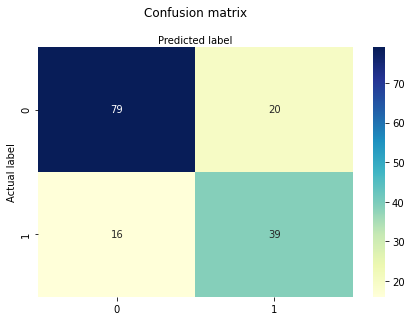

In [ ]:
import seaborn as sns
class_names=[0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Both models show  significant recall (true negative) rates. This shows a repeatable model. In this specific case it's important to equally determine  large TPR vs. 

## Problem 3

Repeat problem 1, and this time use K-fold cross-validation for your training and validation. 

Perform the training two times for K=5 and K=10. Analyze and compare your results against problem 1.

## Problem 4

Repeat problem 2, and this time use K-fold cross-validation for your training and validation. Does this make sense? Elaborate on your answer.

